In [44]:
import numpy as np
import pandas as pd
import os
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
os.getcwd()
# 0 = NO ; 1 = YES

'C:\\Users\\91903\\Desktop\\Projects\\DataSets\\titanic (2)'

In [3]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Replacing missing values in Age with Mean
data['Age'].fillna((data['Age'].mean()), inplace=True)

#Replacing missing values in Embarked with most frequent
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
data_dummy = pd.get_dummies(data, prefix='Category_', columns=['Embarked','Sex'])
data_dummy.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Category__C,Category__Q,Category__S,Category__female,Category__male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [9]:
#Dropping Cabin column as the missing number of values if high
data_dummy.drop(["Cabin","PassengerId","Ticket","Name"],axis = 1 , inplace = True)
data_dummy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Category__C,Category__Q,Category__S,Category__female,Category__male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


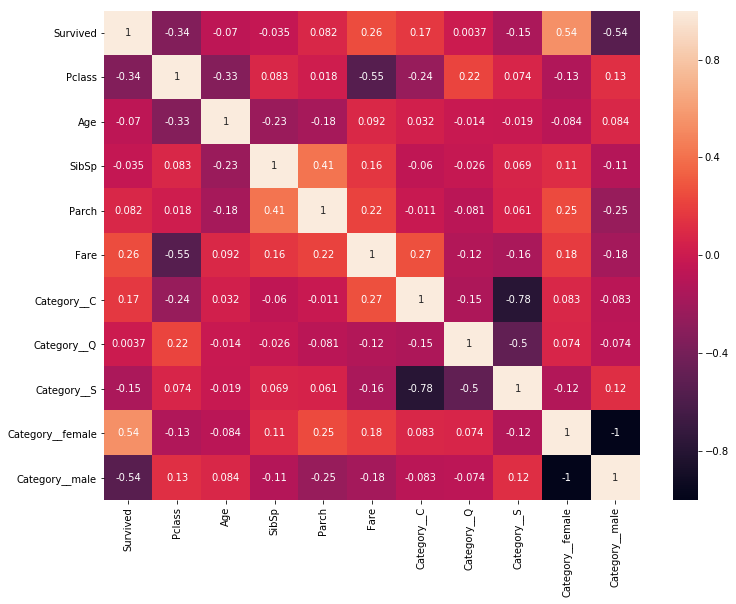

In [10]:
Var_Corr = data_dummy.corr()
# plot the heatmap and annotation on it
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [11]:
#Splitting the data into train and test
y = data_dummy['Survived']
X = data_dummy.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

[0.1043944  0.24789234 0.04340483 0.03728297 0.23312642 0.01468009
 0.00814893 0.00885175 0.20821502 0.09400326]


D:\Users\91903\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


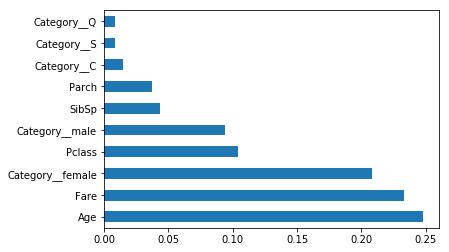

In [13]:
#FEATURE IMPORTANCE

header = data_dummy.drop(data_dummy['Survived'])

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

# LOGISTIC REGRESSION

In [14]:
#hYPERPARAMETER TUNING LOGISTIC REGRESSION
param_grid = {'C' : np.logspace(-4, 4, 20)}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid,cv = 3)

In [15]:
# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

# Predict the labels of the test set: y_pred
y_pred = logreg_cv.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Tuned Logistic Regression Parameters: {'C': 0.23357214690901212}
Best score is 0.7912457912457912
[[98 12]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

0.8100558659217877


D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Users\91903\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

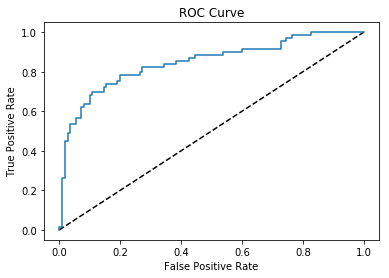

AUC: 0.8467720685111989


In [16]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# DECISION TREE

In [17]:
# Setup the parameters and distributions to sample from: param_dist
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
param_dist = {'criterion': ['entropy'],
               'max_features': ['sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2],
               'min_samples_leaf': [4]}

# Instantiate a Decision Tree classifier: tree
tree1= DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv1 = RandomizedSearchCV(tree1,param_dist,n_iter = 100, cv = 3, verbose=2, random_state=42)

# Fit it to the data
tree_cv1.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv1.best_params_))
print("Best score is {}".format(tree_cv1.best_score_))

y_pred = tree_cv1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))
print(metrics.accuracy_score(y_test, y_pred))

D:\Users\91903\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=entrop

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


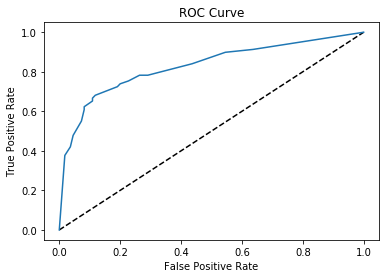

AUC: 0.8280632411067195


In [18]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_tree1 = tree_cv1.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob_tree1)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob_tree1)))

# RANDOM FOREST

In [19]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
#Initiating randomisedsearch
rf = RandomForestClassifier()
rf_rand = RandomizedSearchCV(rf,param_dist,n_iter = 100, cv = 3, verbose=2, random_state=42)
rf_rand.fit(X_train,y_train)
y_pred_rfrand = rf_rand.predict(X_test)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_rand.best_params_))
print("Best score is {}".format(rf_rand.best_score_))
print(confusion_matrix(y_test, y_pred_rfrand))
print(classification_report(y_test, y_pred_rfrand))
print(metrics.accuracy_score(y_test, y_pred_rfrand))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   1.4s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   1.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.2s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.2s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   1.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.4s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   1.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   0.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800,

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   0.7s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.8s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   1.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, mi

[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.5s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   1.2s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   1.0s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, 

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   0.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   1.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total=   1.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   2.1s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.8s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60, bootstrap=False, total=   1.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   0.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=6

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   1.5s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   1.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, 

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.5min finished


Tuned Decision Tree Parameters: {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
Best score is 0.824438202247191
[[102   8]
 [ 25  44]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.85      0.64      0.73        69

   micro avg       0.82      0.82      0.82       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179

0.8156424581005587


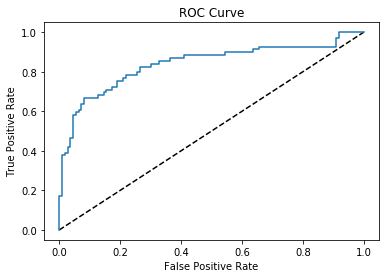

AUC: 0.839262187088274


In [21]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_rf = rf_rand.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob_rf)))

# IMPORTING TEST DATA

In [22]:
test = pd.read_csv("test.csv")

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
#Replacing missing values in Age with Mean
test['Age'].fillna((test['Age'].mean()), inplace=True)
test['Fare'].fillna((test['Fare'].mean()), inplace=True)

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [26]:
test_dummy = pd.get_dummies(test, prefix='Category_', columns=['Embarked','Sex'])
test_dummy.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Category__C,Category__Q,Category__S,Category__female,Category__male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0


In [27]:
#Dropping Cabin column as the missing number of values if high
test_dummy.drop(["Cabin","PassengerId","Ticket","Name"],axis = 1 , inplace = True)
test_dummy.head()

,Pclass,Age,SibSp,Parch,Fare,Category__C,Category__Q,Category__S,Category__female,Category__male
0,3,34.5,0,0,7.8292,0,1,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,1,0
2,2,62.0,0,0,9.6875,0,1,0,0,1
3,3,27.0,0,0,8.6625,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,0,1,1,0


In [28]:
test_dummy.isnull().sum()

Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Category__C         0
Category__Q         0
Category__S         0
Category__female    0
Category__male      0
dtype: int64

# Predicting using logreg

In [30]:
# Predict the labels of the test set: y_pred
logreg_pred = logreg_cv.predict(test_dummy)
test_df = pd.DataFrame(logreg_pred,columns=["Survived"])
test_df['Survived'].value_counts()

0    265
1    153
Name: Survived, dtype: int64

# Predicting using Decision Tree

In [31]:
tree_test = tree_cv1.predict(test_dummy)
treetest_df = pd.DataFrame(tree_test,columns=["Survived"])
treetest_df['Survived'].value_counts()

0    280
1    138
Name: Survived, dtype: int64

# Predicting using Random Forest

In [32]:
rf_test = rf_rand.predict(test_dummy)
rftest_df = pd.DataFrame(rf_test,columns=["Survived"])
rftest_df['Survived'].value_counts()

0    282
1    136
Name: Survived, dtype: int64